# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Paillasse d'expérimentation
---

## Sujet : Comptage des Lemmes sur CorpusLabel

---


## Initialisation de la paillasse 
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd

## Observations et environnement
---

### Chargement du corpus

In [3]:
corpus_filename = 'tmp/221003-CorpusLabel.csv'

In [4]:
df_corpus = pd.read_csv(f'data/{corpus_filename}')
df_corpus = df_corpus.convert_dtypes()

/var/folders/n0/92k02lss71s67fxfyc0qn84m0000gn/T/ipykernel_91295/3410691136.py:1: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_corpus = pd.read_csv(f'data/{corpus_filename}')


In [5]:
df_text_na = df_corpus[df_corpus['text'].isna()]

In [6]:
df_text_na['text']=df_text_na['title']+'\n'+df_text_na['article']

/var/folders/n0/92k02lss71s67fxfyc0qn84m0000gn/T/ipykernel_91295/3320905571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text_na['text']=df_text_na['title']+'\n'+df_text_na['article']


In [7]:
df_corpus[df_corpus['text'].isna()]

,url,title,article,tag,abstract,author,date,date_iso,site,text,...,trop_mots,trop_chiffres,sophisme,inversion_preuve,inverifiable,propos_raportes,sources_citees,titre_decale,denigrement,cherry_picking
15912,https://lezarceleurs.blogspot.com/2022/09/blog...,La spike qui tue et handicape,https://www.naturalnews.com/2022-09-28-call-to...,[],<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,0,0,0,0,0,0,0,0,0,<NA>
25318,https://www.breizh-info.com/2022/09/30/208531/...,Réunification. Les six « insoumis » de Bretagne,"Dans l’opération que prépare Bretagne réunie, ...","['Politique', 'bretagne', 'la france insoumise...",<NA>,<NA>,Le 30 septembre 2022,2022-09-30T00:00:00,<NA>,<NA>,...,0,0,0,0,0,0,0,0,0,0
32384,https://www.dreuz.info/2022/10/elections-de-mi...,Elections américaines de mi-mandat : suivi quo...,Voici le suivi quotidien des élections des mid...,[],<NA>,Publié par Team 100 jours le 3 octobre 2022,Publié par Team 100 jours le 3 octobre 2022,2022-10-03T00:00:00,<NA>,<NA>,...,0,0,0,0,0,0,0,0,0,0
49040,https://www.francesoir.fr/politique-monde/pres...,Présidentielle au Brésil: Bolsonaro talonne Lu...,L'ex-président de gauche Lula s'est imposé sur...,[],<NA>,Auteur(s) FranceSoir avec AFP,Publié le 03 octobre 2022 - 10:30,2022-10-03T10:30:00,<NA>,<NA>,...,0,0,0,0,0,0,0,0,0,0
78508,https://www.lelibrepenseur.org/suede-fin-de-la...,"La nomination de Luc Rémont, ex-banquier d’aff...",C‘est avec ce genre de décision que vous compr...,"['in\nÀ la une, Non-classé, Santé']",<NA>,Par Aguellid,2 octobre 2022,2022-10-02T00:00:00,<NA>,<NA>,...,0,0,0,0,0,1,0,0,0,0
79484,https://www.lesalonbeige.fr/ils-voient-dun-mau...,“Ils voient d’un mauvais oeil cette « invasion...,Arte a diffusé le 24 septembre un documentaire...,[],<NA>,Par Michel Janva,3 octobre 2022,2022-10-03T00:00:00,<NA>,<NA>,...,0,0,0,0,0,0,0,0,0,0
80764,https://www.polemia.com/callac-laboratoire-du-...,"Callac, laboratoire du peuplement de la France...","Par Paul Tormenen, juriste et spécialiste des ...",[],<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,0,0,0,0,0,0,0,1,0,0
88206,https://www.wikistrike.com/2022/09/11-septembr...,11 septembre 2001 : La théorie du « complot pi...,Le 11 septembre pour les nuls Est-il vrai que ...,[],<NA>,<NA>,Publié par wikistrike.com ...,2022-09-29T00:00:00,<NA>,<NA>,...,1,0,0,0,0,1,0,0,0,<NA>
88211,https://www.wikistrike.com/2022/09/coupures-el...,Coupures électriques imminentes en France,"Selon Reuters, le gouvernement français s'appr...",[],<NA>,<NA>,Publié par wikistrike.com ...,2022-09-29T00:00:00,<NA>,<NA>,...,0,0,0,0,0,1,0,1,0,<NA>


## Expérience
---

### Lemmatization du corpus

In [8]:
import patat.ml.lex_analyser

In [9]:
importlib.reload(patat.ml.lex_analyser)

<module 'patat.ml.lex_analyser' from '/Users/fm/Desktop/Work/Patat/patat/ml/lex_analyser.py'>

In [10]:
lex = patat.ml.lex_analyser.LexAnalyser()

In [11]:
def lemmatize(text):
    words = lex.get_words(text)
    lemmas = lex.get_lemmas(words)
    return ' '.join(lemmas)

In [12]:
%%time
df_corpus['lemmas']=df_corpus['text'].apply(lemmatize)

AttributeError: 'NAType' object has no attribute 'lower'

In [13]:
for index,row in df_corpus.sample(10).iterrows():
    print(f"{row['url']}\n{row['lemmas']}")

KeyError: 'lemmas'

### Comptage Mots pour label infox

In [19]:
def merge_texts(texts):
    result = ''
    for text in texts:
        result = result + text + '\n'
    return result

In [20]:
def count_words_label(df,label):
    df = df[df[label].notna()]
    df_texts = pd.pivot_table(df, values='text', index=None, columns=label, aggfunc=merge_texts)
    wc = {}
    word_analysis = {}
    for key in df_texts.keys():
        text = df_texts[key]['text']
        count_colname = label+'_'+str(key)
        wc[key] = lex.count_tokens(lex.get_words(text))
        for word in wc[key]:
            word_dic = word_analysis.get(word,{})
            word_dic[count_colname]=wc[key][word]
            word_analysis[word]=word_dic
    return word_analysis

In [21]:
df = df_corpus
label = 'infox'
df_count = pd.DataFrame(count_words_label(df_corpus,'infox')).T
df_count = df_count.fillna(0)

In [22]:
df_count

,infox_0,infox_1
immigration,45.0,35.0
clandestine,23.0,5.0
répartir,7.0,2.0
ou,542.0,1099.0
renvoyer,6.0,2.0
...,...,...
rogov,0.0,1.0
dniepropietrovsk,0.0,1.0
energodar,0.0,1.0
barges,0.0,1.0


In [23]:
df_count['word']=df_count.index

In [24]:
df_count['lemma']=df_count['word'].apply(lex.get_lemma)

In [25]:
df_count[df_count['lemma']=='clandestin']

,infox_0,infox_1,word,lemma
clandestine,23.0,5.0,clandestine,clandestin
clandestins,39.0,4.0,clandestins,clandestin
clandestines,7.0,0.0,clandestines,clandestin
clandestin,0.0,1.0,clandestin,clandestin


In [26]:
df_lemmas = pd.pivot_table(df_count, values=['infox_0','infox_1'], index=None, columns='lemma', aggfunc=sum).T

In [27]:
df_lemmas['lemma']=df_lemmas.index

#### Identification des mots à ignorer

In [28]:
# Mots rares
occ_rare = 3
def is_rare(row):
    return row['infox_0'] < occ_rare and row['infox_1'] < occ_rare

df_rare = df_count[df_count.apply(is_rare,axis=1)]

rare_words = list(df_rare.index)
len(rare_words)

22749

In [29]:
### Mots communs

common_size = 100
top_0 = df_count.sort_values('infox_0',ascending=False).head(common_size).index
top_1 = df_count.sort_values('infox_1',ascending=False).head(common_size).index
common_words = []
for word in top_0:
    if word in top_1:
        common_words.append(word)
len(common_words)


86

In [30]:
ignore_words = common_words + rare_words
word_vocabulary = [word for word in df_count['lemma'] if word not in ignore_words]
print(f'Vocabulaire = Total mots - mots communs - mots rares = {len(word_vocabulary)}')

Vocabulaire = Total mots - mots communs - mots rares = 16796


#### Identification des lemmes à ignorer

In [31]:
occ_rare = 3
def is_rare(row):
    return row['infox_0'] < occ_rare and row['infox_1'] < occ_rare

df_rare_lemmas = df_lemmas[df_lemmas.apply(is_rare,axis=1)]

rare_lemmas = list(df_rare_lemmas.index)
len(df_rare_lemmas)

15327

In [32]:
### Identification des lemmes communs

common_size = 100
top_0 = df_lemmas.sort_values('infox_0',ascending=False).head(common_size).index
top_1 = df_lemmas.sort_values('infox_1',ascending=False).head(common_size).index
common_lemmas = []
for word in top_0:
    if word in top_1:
        common_lemmas.append(word)
len(common_lemmas)

len(common_lemmas)

84

In [33]:
ignore_lemmas = common_lemmas + rare_lemmas
lemma_vocabulary = [lemma for lemma in df_lemmas['lemma'] if lemma not in ignore_lemmas]
print(f'Lemmes = Total lemmes - lemmes communs - lemmes rares = {len(lemma_vocabulary)}')

Lemmes = Total lemmes - lemmes communs - lemmes rares = 8668


## Mesure et observation des résultats
---

### Wordcloud

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [34]:
def display_wc(text,commonwords):
    wordcloud = WordCloud(background_color = 'white', stopwords = commonwords, max_words = 50, regexp=r"\w\w+").generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show();

In [42]:
lemmas_infox_1='\n'.join(df_corpus[df_corpus['infox']==1]['lemmas'])
lemmas_infox_0='\n'.join(df_corpus[df_corpus['infox']==0]['lemmas'])

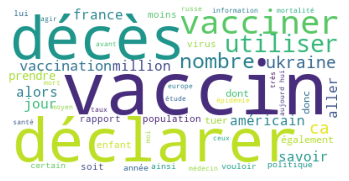

In [43]:
display_wc(lemmas_infox_1,ignore_lemmas)

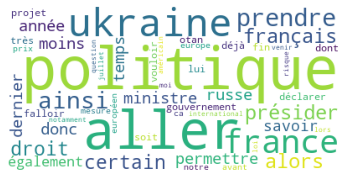

In [44]:
display_wc(lemmas_infox_0,ignore_lemmas)

## Sauvegarde des résultats
---

In [58]:
df_lemmas = df_lemmas.sort_values('infox_1',ascending=False)

df_lemmas_filtered = df_lemmas[df_lemmas['lemma'].apply(lambda l:  l not in ignore_lemmas)]

df_lemmas_filtered.to_csv('data/analysis/221006-LemmesFiltres.csv')

In [53]:
df_words = df_count.sort_values('infox_1',ascending=False)

df_words_filtered = df_words[df_words['word'].apply(lambda l:  l not in ignore_words)]

df_words_filtered.to_csv('data/analysis/221006-MotsFiltres.csv')

In [59]:
df_lemmas_filtered.head(30)

,infox_0,infox_1,lemma
lemma,,,
vaccin,126.0,890.0,vaccin
décès,19.0,821.0,décès
déclarer,166.0,591.0,déclarer
très,169.0,544.0,très
vacciner,45.0,506.0,vacciner
jour,143.0,485.0,jour
cas,146.0,412.0,cas
américain,130.0,411.0,américain
nombre,90.0,392.0,nombre


In [56]:
df_words_filtered.head(30)

,infox_0,infox_1,word,lemma
décès,19.0,821.0,décès,décès
personnes,135.0,538.0,personnes,personne
vaccin,77.0,459.0,vaccin,vaccin
vaccins,49.0,431.0,vaccins,vaccin
nombre,89.0,372.0,nombre,nombre
déclaré,144.0,370.0,déclaré,déclarer
données,70.0,345.0,données,donner
vaccination,74.0,342.0,vaccination,vaccination
unis,135.0,335.0,unis,uni
virus,47.0,323.0,virus,virus


## Conclusions
---

- Production de mots et lemmes pour infox : OK

## Bricolages
---